<center><h1>Lab 3</h1></center>

<center><h2>Sains Data Genap 2020/2021</h2></center>

<center><h2>Deadline: 14 Maret 2021, 23.55 WIB</h2></center>

### Petunjuk Pengerjaan

1.   Lengkapi data **NPM**, **KOLABORATOR** (jika ada), dan **REFERENSI** (jika ada), pada cell di bawah Petunjuk Umum.
3.   Jalankan kode yang telah disediakan dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan pada bagian yang diberikan tanda "SOAL Y"** sesuai dengan perintah yang diberikan.
4.   Dokumen Jupyter Notebook yang telah dijawab dikumpulkan dengan format penamaan **KodeAsdos_Lab3_NPM_Nama.ipynb**. Contoh: LI_Lab3_1706979341_Lulu Ilmaknun Qurotaini.ipynb
5.    Kumpulkan pada submisi yang telah disediakan di scele sebelum **14 Maret 2021, 23.55 WIB**.

In [517]:
#Input NPM
NPM = "1806205722"

#Input NPM teman yang berkolaborasi dengan Anda dalam mengerjakan tugas ini (jika ada)
KOLABORATOR = []

#Input link referensi atau sumber lain yang Anda gunakan dalam menyelesaikan tugas ini (jika ada)
REFERENSI = []

### **Preprocessing pada Titanic Dataset**

Sumber: ToT Microcredential AI-Data Science Dirjen Dikti, dengan beberapa perubahan


# 1. Import library dan data

In [518]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler

In [519]:
# !wget -q  https://raw.githubusercontent.com/RafifEL/SaDat-2021/master/Lab%203/data_titanic3.csv

In [520]:
titanic3 = pd.read_csv('data_titanic3.csv')

In [521]:
# Mencetak dimensi data
print("data: ", titanic3.shape)

data:  (1309, 14)


In [522]:
# Membaca kolom-kolom pada DataFrame
titanic3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## **VARIABLE DESCRIPTIONS:**

`pclass`:          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)

`survival`:        Survival
                (0 = No; 1 = Yes)

`name`:           Name

`sex`:             Sex

`age`:             Age

`sibsp`:           Number of Siblings/Spouses Aboard

`parch`:           Number of Parents/Children Aboard

`ticket`:          Ticket Number

`fare`:            Passenger Fare

`cabin`:           Cabin

`embarked`:        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

`boat`:            Lifeboat

`body`:            Body Identification Number

`home.dest`:       Home/Destination

**SPECIAL NOTES:**

`pclass` is a proxy for socio-economic status (SES)
 
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

In [523]:
titanic3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# 2. Basic summary statistic

In [524]:
titanic3.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Dengan method "describe" kita mendapatkan basic statistics untuk atribut numerik. 

Apa yang bisa diamati?
Pada atribut "fare", standard deviasi tampak tinggi, jauh di atas mean, perlu dilihat lebih jauh distribusi datanya.

In [525]:
# Menampilkan summary dari nonnumeric atribute
display(titanic3.describe(include=np.object))
# "unique" menunjukkan ada berapa variasi nilai dalam suatu atribut. 
# Jika "unique" bernilai 1, atribut tersebut dapat dihapus, karena untuk semua baris nilainya sama"

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [526]:
# Selanjutnya, akan dibuat plot beberapa kolom untuk melihat distribusi frekuensinya
def countplot(column):
    return sns.countplot(x= column, data= titanic3)

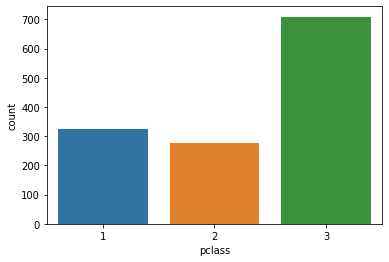

In [527]:
countplot('pclass')
# Tampak bahwa yang tinggi frekuensinya adalah kelas 3 (lower social economic status)

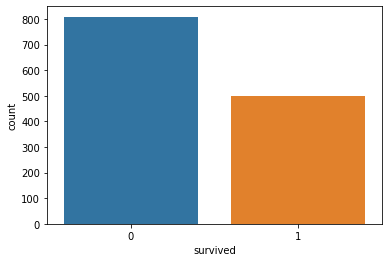

In [528]:
countplot('survived')
# Tampak bahwa penumpang yang survived lebih sedikit dibanding yang tidak selamat

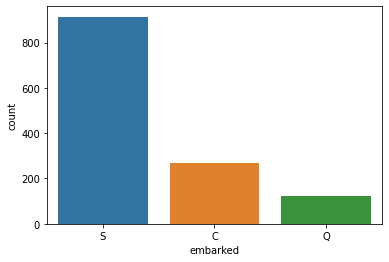

In [529]:
countplot('embarked')

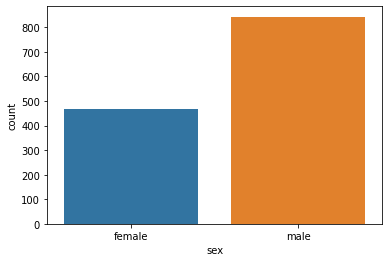

In [530]:
countplot('sex')

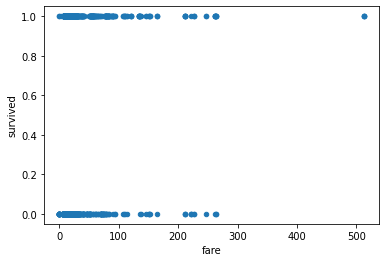

In [531]:
titanic3.plot.scatter(x="fare", y='survived', figsize=(6,4))
# Dari scatter plot ini tampak ada nilai fare yang sangat besar (outlier) pada penumpang yang survived

In [532]:
# Mendapatkan nilai korelasi (koefisien Person) atribut numerik, dengan method "corr"
titanic3.corr(method='pearson')


,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [533]:
# Mendapatkan nilai korelasi dari atribut nonnumerik, dengan method "chi2"
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2,pval,dof,expected = scp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return

In [534]:
# Korelasi antara survived dengan pclass
compute_freq_chi2(titanic3.survived,titanic3.pclass)
# Penumpang kelas 3 yang tidak survive mencapai 500 orang lebih

Frequency table
pclass      1    2    3
survived               
0         123  158  528
1         200  119  181
ChiSquare test statistic:  127.85915643930328
p-value:  1.7208259588256052e-28


In [535]:
compute_freq_chi2(titanic3.survived,titanic3.embarked)
# Embarkasi S paling banyak yang tidak survived

Frequency table
embarked    C   Q    S
survived              
0         120  79  610
1         150  44  304
ChiSquare test statistic:  44.2417430714525
p-value:  2.471880987482563e-10


In [536]:
compute_freq_chi2(titanic3.survived,titanic3.sex)

Frequency table
sex       female  male
survived              
0            127   682
1            339   161
ChiSquare test statistic:  363.6179084388249
p-value:  4.589924936952945e-81


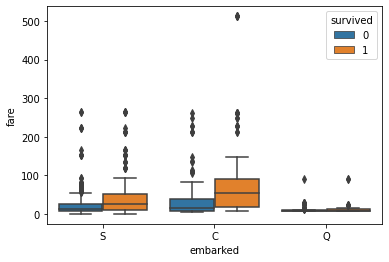

In [537]:
sns.boxplot(x="embarked", y="fare", hue="survived", data=titanic3);

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


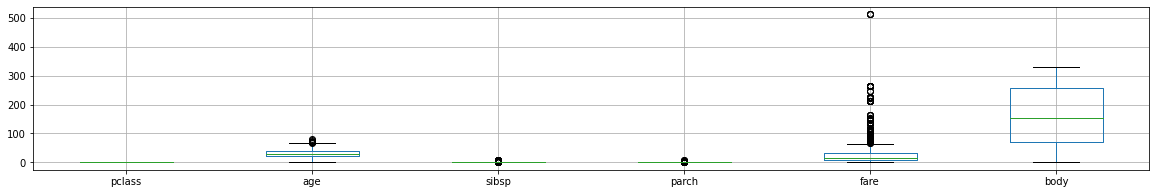

In [538]:
data2 = titanic3.drop(['survived'],axis=1)
data2.boxplot(figsize=(20,3))

# 3. Data Preprocessing

Preprocessing data dilakukan untuk menyiapkan dataset agar dapat digunakan pada proses klasifikasi. Pada beberapa algoritma klasifikasi, dibutuhkan preprocessing khusus agar algoritma dapat berjalan dengan baik.

**DISCLAIMER!**  Pada contoh ini, preprocessing yang 
dilakukan dimaksudkan untuk algoritma yang memmiliki karakteristik:
* sensitif terhadap outlier
* fitur-fiturnya perlu memiliki range yang setara

## **SOAL 1**

(a) Dari boxplot yang Anda lihat, atribut apa yang mengandung outlier paling banyak?

(b) Buatlah code untuk menampilkan banyaknya outlier pada atribut tersebut!

(c) Apa yang dapat Anda lalukan untuk menangani outlier tersebut? (Impelementasikan dengan code)

**1(a).**

In [539]:
titanic3.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Dari summary data diatas, menurut saya bukan merupakan atribut yang relevan untuk melakukan prediksi karena hanya berupa nomor identifikasi tubuh/mayat sehingga tidak perlu melakukan penghilangan outlier.

Pclass dan survived juga tidak dilakukan penghilangan outlier karena pclass merupakan data kategori dan survide merupakan atribut yang ingin diprediksi.

outlier age, sibsp, dan parch tidak dapat dihitung dengan tekhnik IQR karena nilainya masih masuk akal dan bukan merupakan anomali. namun dengan beberapa asumsi, kita dapat menghitung outlier atribut age berdasarkan asumsi umur dan kebutuhannya akan pedamping.

Karena pclass menunjukkan status ekonomi seseorang, maka kita dapat menghitung outlier fare berdasarkan kelasnya dengan IQR

In [540]:
# Asumsi anak-anak belum dewasa dan belum butuh pedamping berada di kisaran 0-16 tahun
# Dan umur orang tia butuh pendamping berada di kisaran umur >= 65 tahun dan butuh pedamping.

data_child = titanic3[titanic3["age"] <= 16]
data_elder = titanic3[titanic3["age"] >= 65]
print(f"Jumlah anak-anak: {data_child['parch'].count()}")
print(f"Jumlah lansia: {data_elder['parch'].count()}")
print(f"Rata-rata parch pada anak-anak: {data_child['parch'].mean()}")
print(f"Rata-rata parch pada lansia: {data_elder['parch'].mean()}")
print(f"Rata-rata parch pada lansia: {data_elder['sibsp'].mean()}")

Jumlah anak-anak: 134
Jumlah lansia: 13
Rata-rata parch pada anak-anak: 1.171641791044776
Rata-rata parch pada lansia: 0.15384615384615385
Rata-rata parch pada lansia: 0.23076923076923078


In [541]:
## Dari kesimpulan diatas saya mengasumsikan bahwa anak-anak dan orang tua minimal
## mempunyai satu pedamping (sibsp / parch) dan untuk anak-anak, pedamping maksimal adalah 2 karena
## anak-anak2 diasumsikan belum mempunyai anak pada saat ini.
child_outlier = data_child[(data_child['parch'] < 1) | (data_child['parch'] > 2)]
elder_outlier = data_elder[(data_elder['parch'] < 1) & (data_elder['sibsp'] < 1)]

In [542]:
print(f'Jumlah Outlier pada umur anak-anak: {child_outlier["age"].count()}')
print(f'Jumlah Outlier pada umur lansia: {elder_outlier["age"].count()}')
print(f'Jumlah Outlier anak-anak dan lansia : {elder_outlier["age"].count() + child_outlier["age"].count() }')

Jumlah Outlier pada umur anak-anak: 27
Jumlah Outlier pada umur lansia: 9
Jumlah Outlier anak-anak dan lansia : 36


Maka kesimpulannya, terdapat 36 outlier berdasarkan pada atribut age dengan faktor outlier pedamping.

In [543]:
# 1(b) Implementasi code di sini
""" 
Apabila secara naif, kita dapat menghitung outlier pada suatu data dengan
membandingkannya langsung dengan IQR
""" 
q1 = titanic3["fare"].quantile(0.25)
q3 = titanic3["fare"].quantile(0.75)
print(q3)
print(q1)
iqr = q3 - q1
naiv_lower_bound = q1 - (1.5 * iqr)
naiv_upper_bound = q3 + (1.5 * iqr)
outlier_data = titanic3[(titanic3["fare"] > naiv_upper_bound) | 
                        (titanic3["fare"] < naiv_lower_bound) ]
print(f"Banyak outlier pada atribut fare: {outlier_data['fare'].count()}")


31.275
7.8958
Banyak outlier pada atribut fare: 171


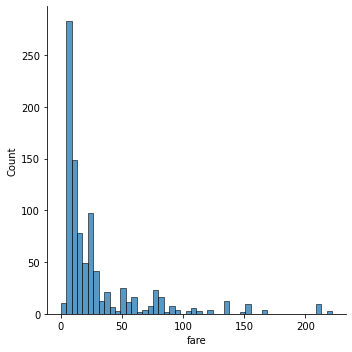

In [585]:
sns.displot(data=titanic3['fare'])

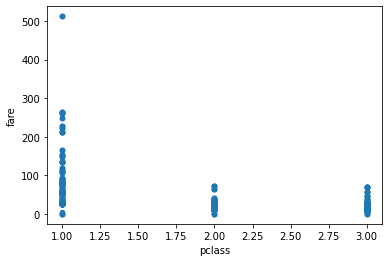

In [544]:
# Secara tidak naif, mari kita liat relasi antara pclass dan fare
titanic3.plot.scatter(x="pclass", y='fare', figsize=(6,4))

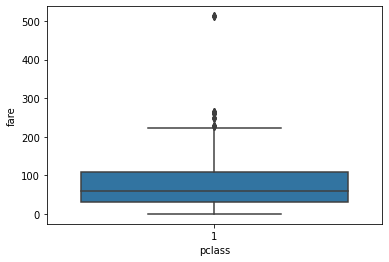

In [545]:
# Boxplot fare pada pclass=1
sns.boxplot(x="pclass", y="fare", data=titanic3[titanic3["pclass"] == 1]);

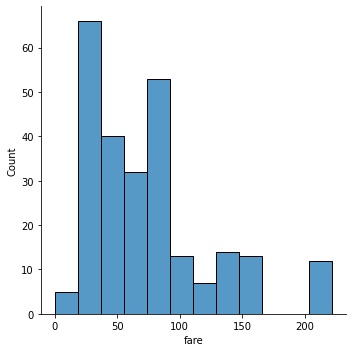

In [583]:
sns.displot(data=titanic3[titanic3["pclass"] == 1]['fare'])

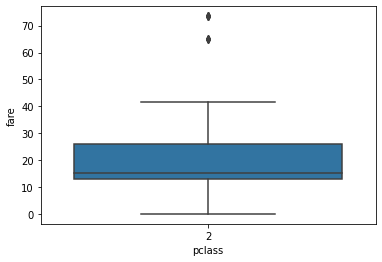

In [546]:
# Boxplot fare pada pclass=2
sns.boxplot(x="pclass", y="fare", data=titanic3[titanic3["pclass"] == 2]);

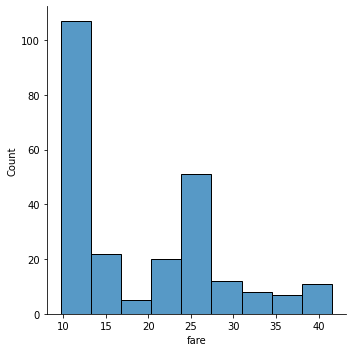

In [584]:
sns.displot(data=titanic3[titanic3["pclass"] == 2]['fare'])

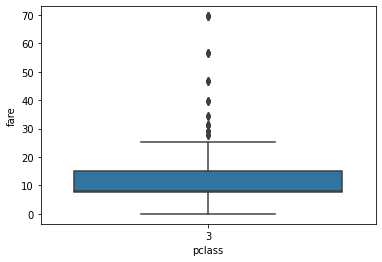

In [547]:
# Boxplot fare pada pclass=3
sns.boxplot(x="pclass", y="fare", data=titanic3[titanic3["pclass"] == 3]);

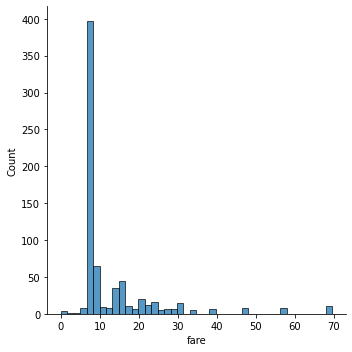

In [548]:
sns.displot(data=titanic3[titanic3["pclass"] == 3]['fare'])

In [582]:
print(titanic3[titanic3["pclass"] == 3].quantile(0.75))
print(titanic3[titanic3["pclass"] == 3].quantile(0.25))

pclass        3.00000
survived      1.00000
age          32.00000
sibsp         0.00000
parch         0.00000
fare         10.50315
body        255.00000
Name: 0.75, dtype: float64
pclass       3.00
survived     0.00
age         20.00
sibsp        0.00
parch        0.00
fare         7.75
body        61.00
Name: 0.25, dtype: float64


In [550]:
"""
Dari sini kita dapat melihat persebaran harga dari sini kita menghitung banyak outlier 
sesuai dengan nilai IQR tiap kelas pclass
"""
bound_farpcl = [0,0,0]
count_outlier = [0,0,0]
for ii in range(1,4):
  data_fare = titanic3[titanic3["pclass"] == ii]
  q1 = data_fare["fare"].quantile(0.25)
  q3 = data_fare["fare"].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  outlier_data = data_fare[(data_fare["fare"] > upper_bound) | 
                        (data_fare["fare"] < lower_bound) ]
  bound_farpcl[ii-1] = [lower_bound, upper_bound]
  count_outlier[ii-1] = outlier_data['fare'].count()
  print(f"Banyak data pclass={ii}: {data_fare['fare'].count()}")
  print(f"Banyak Outlier fare pclass={ii}: {count_outlier[ii-1]}")

print(f"Jumlah outlier: {np.sum(count_outlier)}")

Banyak data pclass=1: 323
Banyak Outlier fare pclass=1: 25
Banyak data pclass=2: 277
Banyak Outlier fare pclass=2: 12
Banyak data pclass=3: 708
Banyak Outlier fare pclass=3: 65
Jumlah outlier: 102


In [551]:
# Maka dari dua atribut diatas atribut yang mengandung outlier terbanyak,
# adalah atribut fare dengan 102 outlier dengan pengkategorian sesuai pclass

**Soal 1(b)**
dapat melihat pencarian atribut terbanyak dari jawaban nomor 1a.

**Soal 1(c)**

Karena data outlier sedikit dibandingkan dengan total data > 1000, maka outlier akan dibersihkan dengan cara di drop.



In [552]:
# menandai data outlier dengan mengganti umur dengan -1
def mark_age(cols):
  age = cols[0]
  parch = cols[1]
  sibsp = cols[2]
  if age <= 16 and (parch < 1 or parch > 2): 
    return -1
  elif age >= 65 and parch < 1 and sibsp < 1:
    return -1
  else:
    return age

titanic3["age"] = titanic3[["age", "parch", "sibsp"]].apply(mark_age, axis=1)
#Drop umur dibawah 0
titanic3 = titanic3[titanic3["age"] > 0]

In [553]:
"""
Menandai outlier fare dengan nilai fare digganti dengan -1 lalu drop
"""
def mark_fare(cols):
  pclass = cols[1]
  fare = cols[0]
  if fare < bound_farpcl[int(pclass)-1][0] or fare > bound_farpcl[int(pclass)-1][1]:
    return -1
  else:
    return fare

titanic3["fare"] = titanic3[["fare", "pclass"]].apply(mark_fare, axis=1)
titanic3 = titanic3[titanic3["fare"] != -1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


**Check Hasil**

In [555]:
#Cek duplikasi data

titanic3.duplicated(keep=False).sum()

0

In [556]:
int("3")

3

In [557]:
#Cek missing value

def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [558]:
cek_null(titanic3)
# Tampak beberapa atribut memiliki null value yang sangat banyak
# Atribut "body" memiliki null value hingga 90%, "cabin" hingga 77%

           Total   Percent
body         814  0.880000
cabin        678  0.732973
boat         549  0.593514
home.dest    316  0.341622
embarked       2  0.002162
fare           1  0.001081


In [559]:
# Melihat isi cabin (20 baris pertama)
titanic3['cabin'].head(20)

0          B5
1     C22 C26
2     C22 C26
3     C22 C26
4     C22 C26
5         E12
6          D7
7         A36
8        C101
12        B35
13        NaN
18        D15
19         C6
20        D35
21        D35
22       C148
24        C97
25        NaN
26        B49
27        B49
Name: cabin, dtype: object

In [560]:
# Melihat berapa penumpang yang survive di tiap cabin
(titanic3
 .groupby([titanic3.cabin.str[:1],'survived'])
 .survived
 .count()
 .unstack())

survived,0,1
cabin,,
A,7.0,10.0
B,15.0,35.0
C,31.0,46.0
D,12.0,30.0
E,9.0,28.0
F,6.0,12.0
G,2.0,3.0
T,1.0,NaN


In [561]:
# Melihat rerata fare di tiap cabin, untuk kelompok yang survived dan tidak survived
(titanic3
 .groupby([titanic3.cabin.str[:1],'survived'])
 .fare
 .mean()
 .unstack())

survived,0,1
cabin,,
A,30.456543,50.152490
B,57.643053,85.812386
C,100.085890,92.646287
D,50.962492,56.777647
E,48.037033,59.251936
F,12.491667,22.281600
G,10.462500,16.700000
T,35.500000,NaN


In [562]:
#drop atribut yang dianggap tidak penting

titanic3_cleaned = titanic3.drop(['name', 'ticket', 'body', 'cabin','home.dest'], axis=1)
titanic3_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,29.00,0,0,211.3375,S,2
1,1,1,male,0.92,1,2,151.5500,S,11
2,1,0,female,2.00,1,2,151.5500,S,NaN
3,1,0,male,30.00,1,2,151.5500,S,NaN
4,1,0,female,25.00,1,2,151.5500,S,NaN


In [563]:
cek_null(titanic3_cleaned)

          Total   Percent
boat        549  0.593514
embarked      2  0.002162
fare          1  0.001081


In [564]:
# Setelah dihapus atribut yang tidak penting, perlu ditangani atribut yang masih mengandung null value
# Untuk atribut boat, akan null value akan diisi dengan "None"
titanic3_cleaned['boat'] = titanic3_cleaned['boat'].fillna('None')

In [565]:
#check jumlah yg survived dan tidak jika mempunyai boat atau tidak
(titanic3_cleaned
 .groupby([titanic3_cleaned.boat,'survived'])
 .boat
 .count()
 .unstack())

survived,0,1
boat,,
1,NaN,4.0
10,NaN,23.0
11,NaN,24.0
12,1.0,18.0
13,NaN,29.0
13 15,NaN,2.0
13 15 B,NaN,1.0
14,NaN,29.0
15,NaN,31.0


In [566]:
cek_null(titanic3_cleaned)

          Total   Percent
embarked      2  0.002162
fare          1  0.001081


In [567]:
# Untuk atribute "age", null value akan diisi dengan nilai median
col = ["age"]
for c in col:
    median = titanic3_cleaned[~titanic3_cleaned.isna()].median()[0]
    titanic3_cleaned[c] = titanic3_cleaned[c].fillna(median)

In [568]:
# Untuk atribute "embarked", null value akan diisi dengan nilai 'C'
titanic3_cleaned["embarked"] = titanic3_cleaned["embarked"].fillna('C')

In [569]:
cek_null(titanic3_cleaned)

      Total   Percent
fare      1  0.001081


In [570]:
# Tinggal atribute "fare" yang memiliki 1 baris nilai null
titanic3_cleaned[titanic3_cleaned['fare'].isnull()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
1225,3,0,male,60.5,0,0,NaN,S,None


In [571]:
# Hapus baris yang atribute "fare" bernilai null
titanic3_cleaned.dropna(inplace=True)

In [572]:
#jumlah baris berubah dari 1309 menjadi 1308 dan jumlah fitur dari 14 menjadi 9

titanic3_cleaned.shape

(924, 9)

In [573]:
titanic3_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,29.00,0,0,211.3375,S,2
1,1,1,male,0.92,1,2,151.5500,S,11
2,1,0,female,2.00,1,2,151.5500,S,None
3,1,0,male,30.00,1,2,151.5500,S,None
4,1,0,female,25.00,1,2,151.5500,S,None


In [574]:
titanic3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    924 non-null    int64  
 1   survived  924 non-null    int64  
 2   sex       924 non-null    object 
 3   age       924 non-null    float64
 4   sibsp     924 non-null    int64  
 5   parch     924 non-null    int64  
 6   fare      924 non-null    float64
 7   embarked  924 non-null    object 
 8   boat      924 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 72.2+ KB


In [575]:
#melakukan label encoding, untuk mengubah data kategorikal bertipe string ke numeric value

col = titanic3_cleaned.select_dtypes(include=["object"]).columns

for c in col:
    if len(titanic3_cleaned[c].value_counts()) <= 28:
        le = LabelEncoder() 
        le.fit(list(titanic3_cleaned[c].values)) 
        titanic3_cleaned[c] = le.transform(list(titanic3_cleaned[c].values))

In [577]:
titanic3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    924 non-null    int64  
 1   survived  924 non-null    int64  
 2   sex       924 non-null    int64  
 3   age       924 non-null    float64
 4   sibsp     924 non-null    int64  
 5   parch     924 non-null    int64  
 6   fare      924 non-null    float64
 7   embarked  924 non-null    int64  
 8   boat      924 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 72.2 KB


In [586]:
titanic3_cleaned["embarked"].max()

2

In [578]:
# Untuk task klasifikasi, atribut yang menjadi target adalah "survived", sedangkan atribut lainnya menjadi predictor
# Kita akan memisahkan atribut target (Y) dengan atribut predictor (X)

X = titanic3_cleaned.drop('survived', axis=1)
Y = titanic3_cleaned['survived']

In [579]:
# Dilakukan Normalisasi pada atribut-atribut X 
# Menghasilkan X_scaled, yang merupakan dataset yang sudah "clean" dan siap untuk menjadi input untuk machine learning (klasifikasi)

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

## **SOAL 2**

(a) Jika akan dilakukan klasifikasi pada data titanic ini, apakah X perlu dinormalisasi?

(b) Bentuk normalisasi apa yang dapat dipilih? Apa alasannya? 

(c) Implementasikan bentuk normalisasi yang Anda pilih!




**1(a)** beberapa atribut perlu dinormalisasi

**1(b)** 
Untuk atribut age, sibsp, parch, fare membutuhkan normalisasi dengan cara zscore/standard score karena data yang akan diterima nanti setelah hasil training dari data tersebut tidak diketahui nilai maksimumnya dan nilai minimumnya sehingga perlu dinormalisasi untuk melakukan klasifikasi.

Untuk data pclass, sex, dan embarked dapat dilakukan normalisasi dengan min-max scaler, akan tetapi belum diperlukan karena data tersebut merupakan data categorical dan kita tahu nilai maksimum dan minimumnya.

Data boat juga tidak dibutuhkan normalisasi karena data tersebut merupakan nomor indentifikasi lifeboat apabila selamat.

In [581]:
# 2(c) Implementasi code di sini
X_norm = X.copy()

In [593]:
cols_name = ["age", "sibsp", "parch", "fare"]
features = X_norm[cols_name]
features = sc.fit_transform(features)
X_norm[cols_name] = features
X_norm.head()

,pclass,sex,age,sibsp,parch,fare,embarked,boat
0,1,0,-0.106696,-0.604494,-0.496155,4.799536,2,10
1,1,1,-2.185533,1.048027,2.721019,3.215225,2,2
2,1,0,-2.105578,1.048027,2.721019,3.215225,2,26
3,1,1,-0.032663,1.048027,2.721019,3.215225,2,26
4,1,0,-0.402827,1.048027,2.721019,3.215225,2,26
